# DATA PREPROCESSING

In [1]:
# Importing required packages
import numpy as np
import pandas as pd

In [2]:
# changing settings to display all columns
pd.set_option("display.max_columns", None)

In [3]:
#importing the dataset
dataset_1 = pd.read_csv("../datasets/unsupervised learning/Wholesale customers data.csv")

In [4]:
dataset_1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
# Shape of the dataset
dataset_1.shape

(440, 8)

In [6]:
# Columns in the dataset
dataset_1.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
# Getting summary statistics for the dataset
dataset_1.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Removing null values

In [8]:
# Using the pandas isnull() function to count the null values present in each column
pd.isnull(dataset_1).sum(axis=0)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Removing duplicate entries

In [9]:
#Checking for duplicate entries
dataset_1[dataset_1.duplicated()]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Removing outliers

In [10]:
# Creating an outlier removal function
def outlier(dataframe_in, col_names):
    q1 = dataframe_in[col_names].quantile(0.25)
    q3 = dataframe_in[col_names].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_fence  = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    dataframe_out = dataframe_in.loc[(dataframe_in[col_names] > lower_fence) & (dataframe_in[col_names] < upper_fence)]
    return dataframe_out

In [11]:
# Removing outliers for all columns except target variable MEDV
cols = list(dataset_1.columns)

dataset_2 = dataset_1
for x in cols:
    dataset_2 = outlier(dataset_2, x)
    
dataset_2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


Examining categorical variables

In [12]:
# Since Channel and Region are categorical variables we check whether it has unacceptable values other
print(dataset_2["Channel"].value_counts())
print(dataset_2["Region"].value_counts())

1    232
2     86
Name: Channel, dtype: int64
3    233
1     55
2     30
Name: Region, dtype: int64


In [13]:
#checking dtypes of entries
dataset_2.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [14]:
# Final check of cleaned dataset
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           318 non-null    int64
 1   Region            318 non-null    int64
 2   Fresh             318 non-null    int64
 3   Milk              318 non-null    int64
 4   Grocery           318 non-null    int64
 5   Frozen            318 non-null    int64
 6   Detergents_Paper  318 non-null    int64
 7   Delicassen        318 non-null    int64
dtypes: int64(8)
memory usage: 22.4 KB


In [15]:
# resetting index of the dataset
dataset_3 = dataset_2.reset_index(drop=True)
dataset_3

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,1,3,13265,1196,4221,6404,507,1788
3,2,3,9413,8259,5126,666,1795,1451
4,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
313,1,3,21117,1162,4754,269,1328,395
314,1,3,1982,3218,1493,1541,356,1449
315,1,3,16731,3922,7994,688,2371,838
316,1,3,10290,1981,2232,1038,168,2125


In [16]:
#Saving final cleaned dataset in an object
dataset = dataset_3.copy()
dataset

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,1,3,13265,1196,4221,6404,507,1788
3,2,3,9413,8259,5126,666,1795,1451
4,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
313,1,3,21117,1162,4754,269,1328,395
314,1,3,1982,3218,1493,1541,356,1449
315,1,3,16731,3922,7994,688,2371,838
316,1,3,10290,1981,2232,1038,168,2125


# EXPLORATORY DATA ANALYSIS

In [17]:
# Importing packages
import matplotlib.pyplot as plt
import seaborn as sns

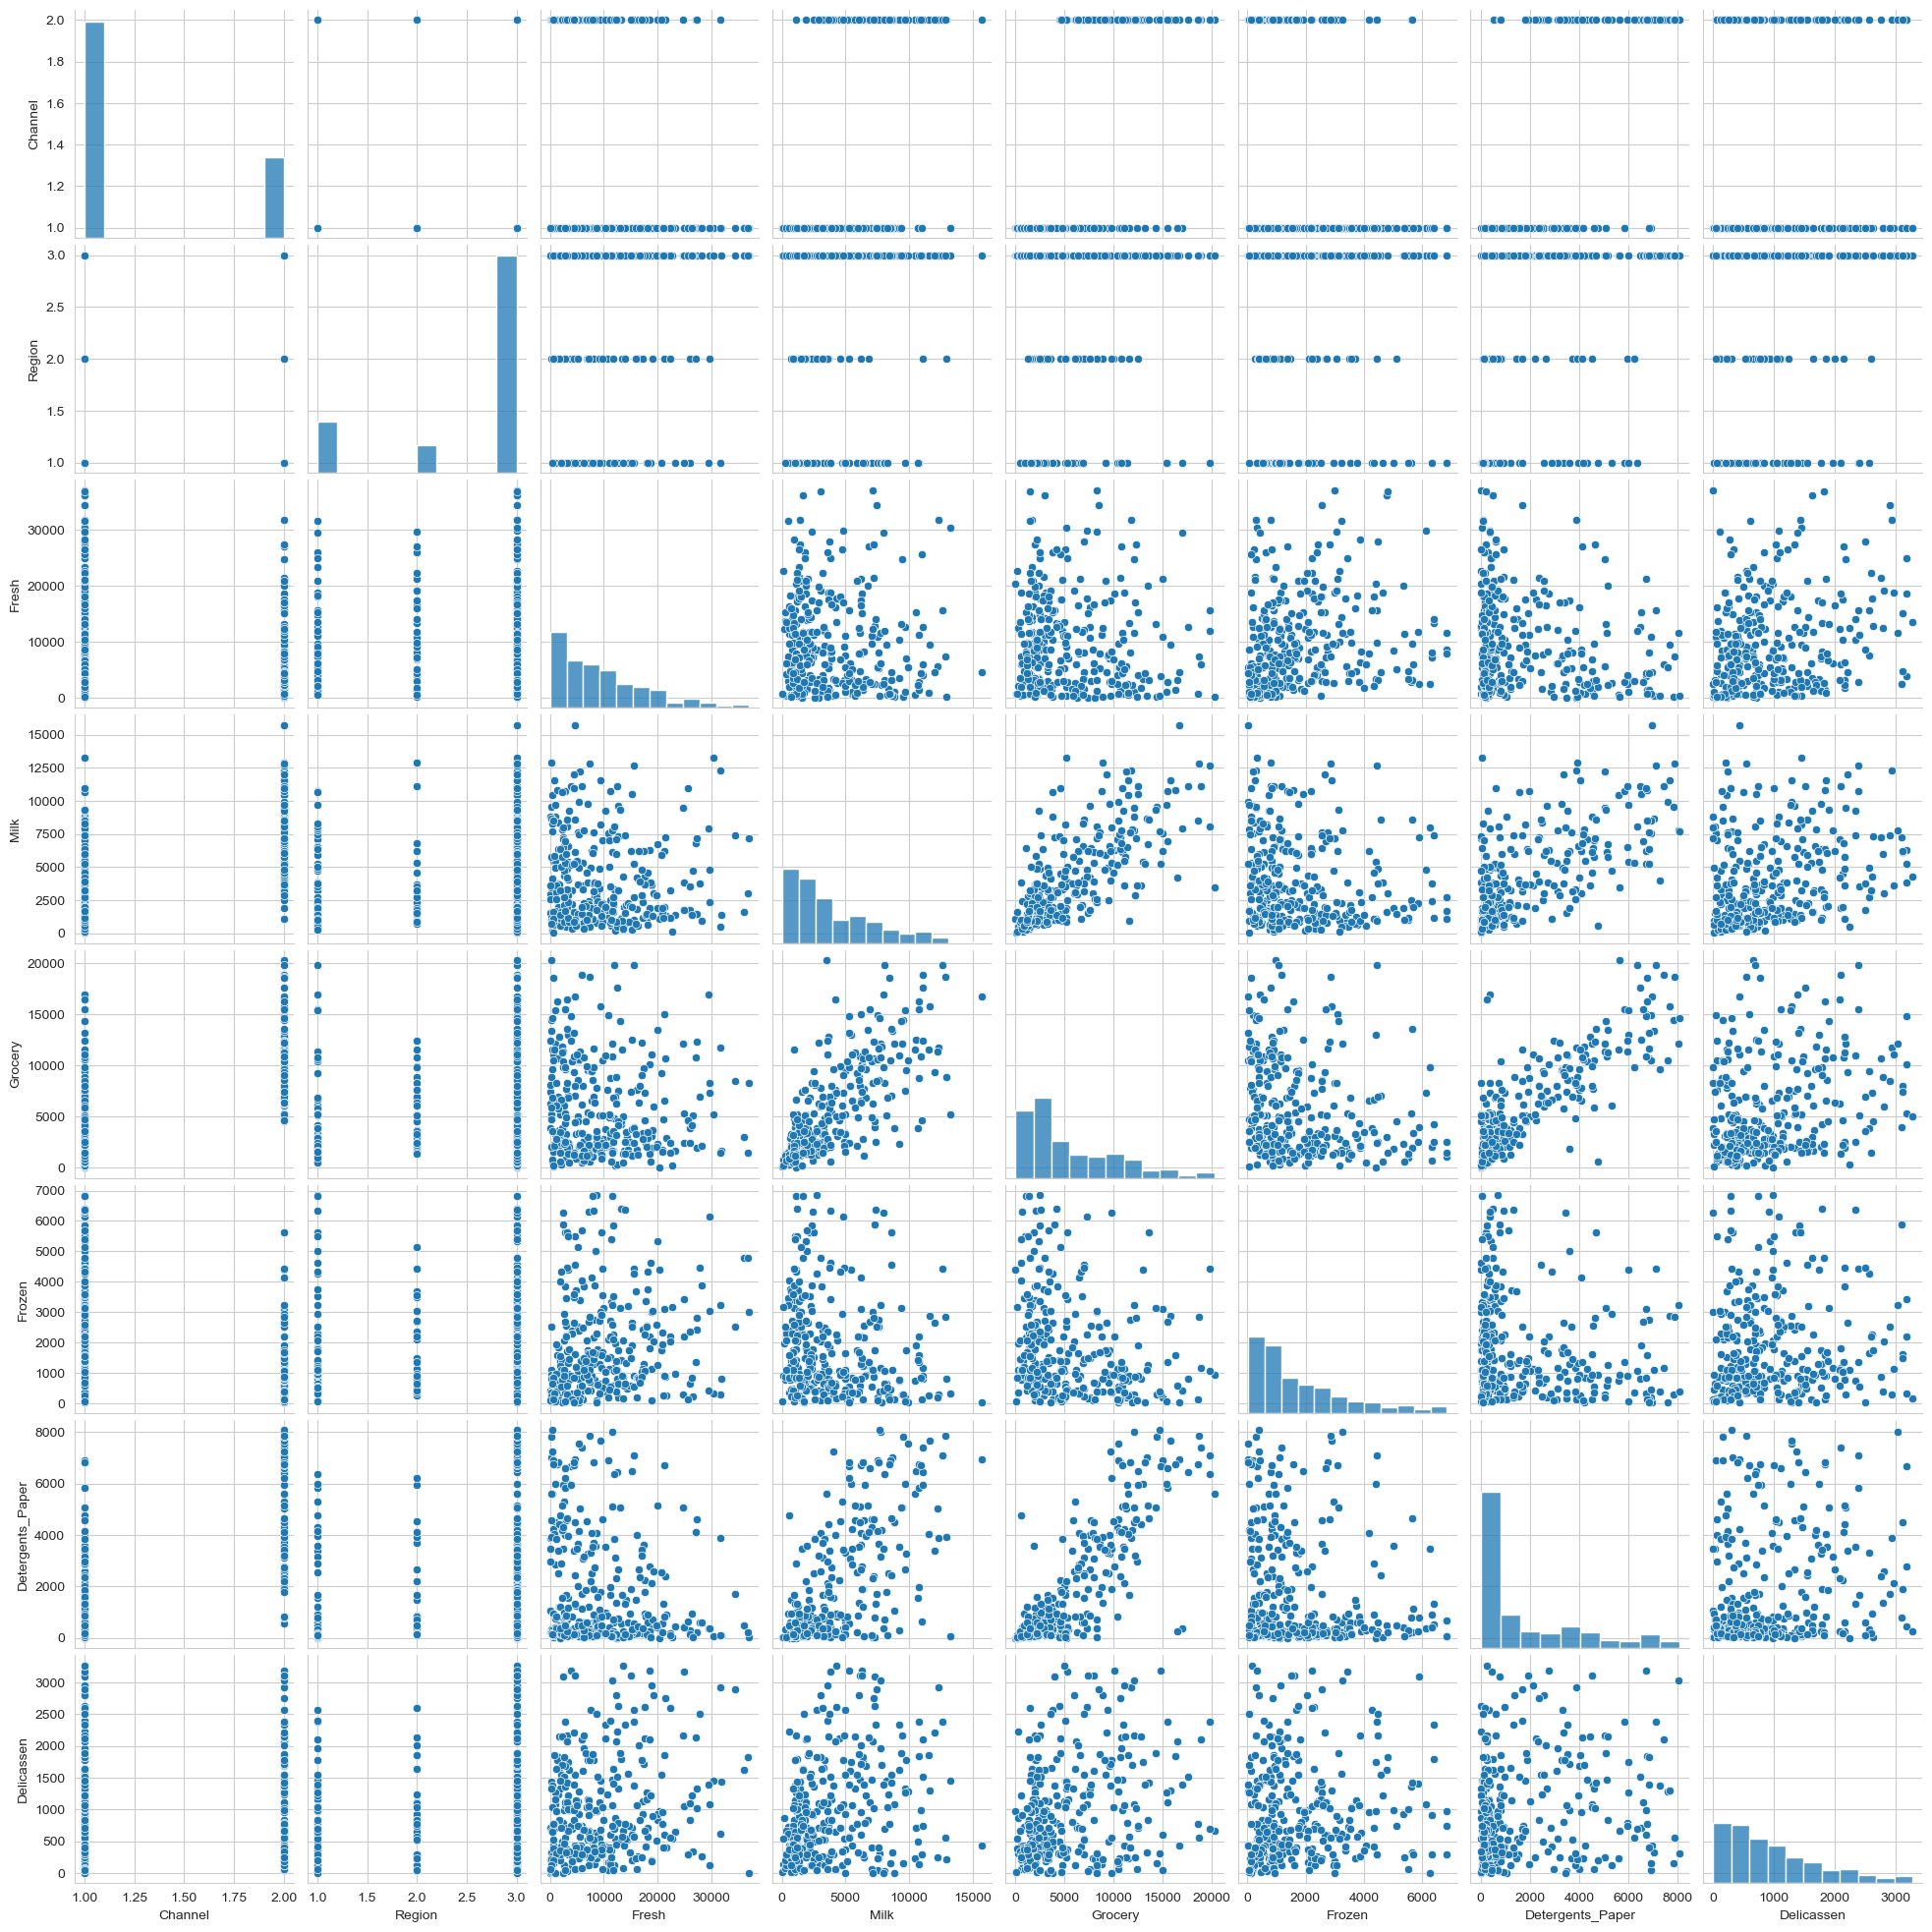

In [18]:
# Pairplot for all variables
sns.set_style("whitegrid")
sns.pairplot(dataset)
plt.show()

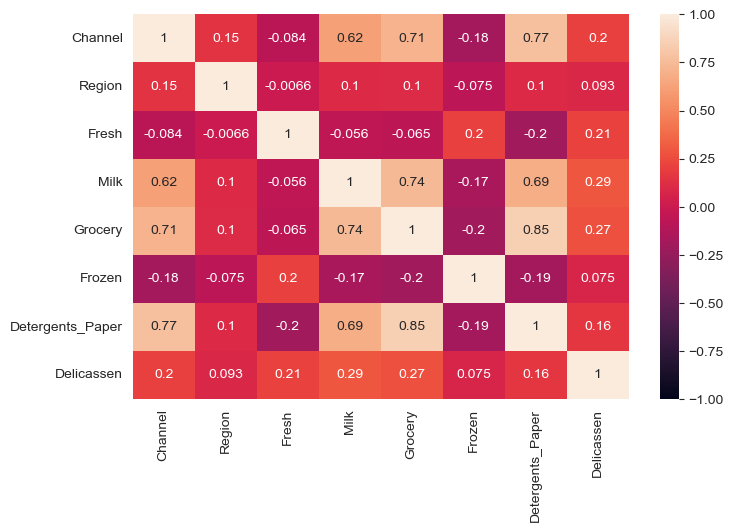

In [19]:
#Creating a correlation matrix
f, ax = plt.subplots(figsize=(8,5))

correlation_matrix = dataset.corr('pearson')
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)

plt.show()

Channel has a significant correlation with Detergents_Paper, Grocery and Milk.  
Milk has a signficant correlation with Detergents_Paper and Grocery.  
Grocery has a signficant correlation with Detergents_Paper.

### Plotting scatterplots for the highly correlated variables

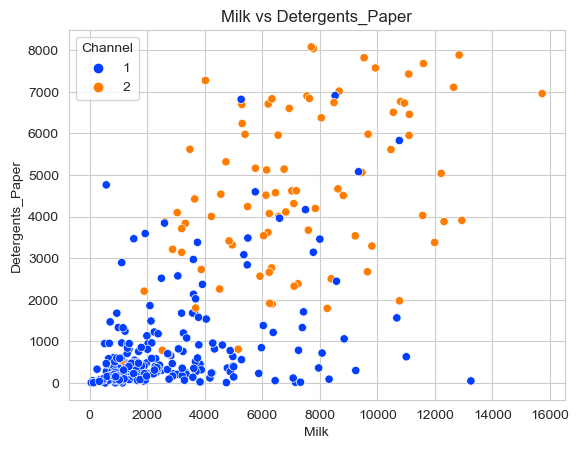

In [20]:
# Milk vs Detergents_Paper
sns.scatterplot(data=dataset, x="Milk", y='Detergents_Paper', hue='Channel', palette='bright')
plt.title('Milk vs Detergents_Paper')
plt.show()

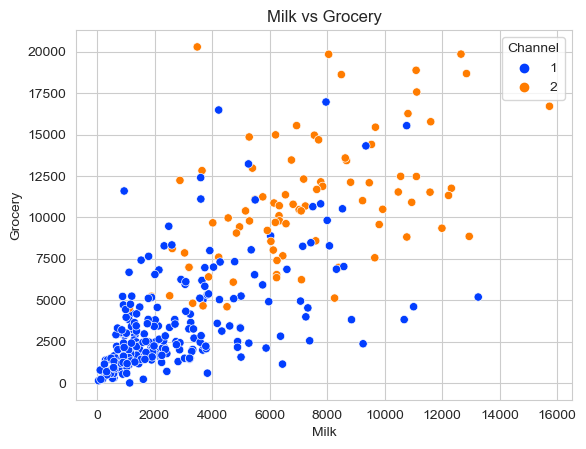

In [21]:
# Milk vs Grocery
sns.scatterplot(data=dataset, x="Milk", y='Grocery', hue='Channel', palette='bright')
plt.title('Milk vs Grocery')
plt.show()

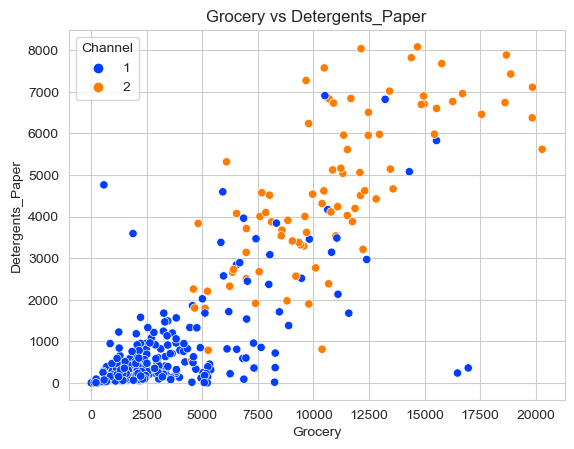

In [22]:
# Grocery vs Detergents_Paper
sns.scatterplot(data=dataset, x="Grocery", y='Detergents_Paper', hue='Channel', palette='bright')
plt.title('Grocery vs Detergents_Paper')
plt.show()

All of the above scatterplots show that Channel 2 has more exorbitant and volatile prices than compared to channel 1.  

However, channel 1 has more sales which can be seen from the density of the scatterplots. Therefore, it is evident that channel 1 made the greater total revenue.


### Checking which Region and Channel spend the most and the least

In [23]:
# Grouping the dataset by Channel and Region and summing all values and resetting the indexes
dataset_grouped = dataset.groupby(['Channel','Region'])['Fresh', 'Milk', 'Grocery','Frozen',
                                     'Detergents_Paper', 'Delicassen'].sum().reset_index()
dataset_grouped

C:\Users\brend\AppData\Local\Temp\ipykernel_21468\2800520446.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset_grouped = dataset.groupby(['Channel','Region'])['Fresh', 'Milk', 'Grocery','Frozen',


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,1,477684,148286,174256,100642,48591,39349
1,1,2,257560,41166,88690,46219,10705,19345
2,1,3,1616031,452642,565665,311737,127374,147179
3,2,1,43883,44565,77613,13487,31297,7255
4,2,2,73091,52060,70441,7060,33328,7473
5,2,3,622128,529839,792586,93145,334017,92372


In [24]:
# Making a total column which sums up spending in each individual avenue
dataset_grouped['Total']=dataset_grouped['Fresh']+ dataset_grouped['Milk']+ dataset_grouped['Grocery']+dataset_grouped['Frozen']+dataset_grouped['Detergents_Paper']+dataset_grouped['Delicassen']
dataset_grouped

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,1,1,477684,148286,174256,100642,48591,39349,988808
1,1,2,257560,41166,88690,46219,10705,19345,463685
2,1,3,1616031,452642,565665,311737,127374,147179,3220628
3,2,1,43883,44565,77613,13487,31297,7255,218100
4,2,2,73091,52060,70441,7060,33328,7473,243453
5,2,3,622128,529839,792586,93145,334017,92372,2464087


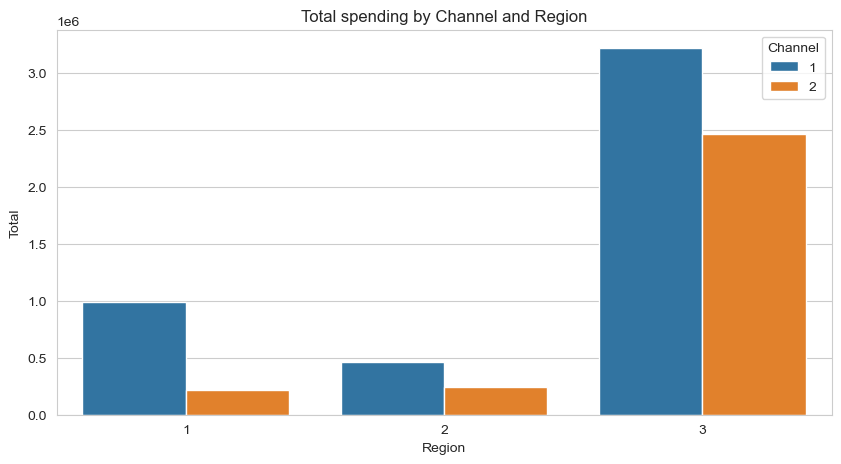

In [25]:
# Plotting a bar plot
plt.figure(figsize=(10,5))
sns.barplot(data = dataset_grouped, x = 'Region', y = 'Total', hue = 'Channel')
plt.title('Total spending by Channel and Region')
plt.show()

Region 3 seems to have the highest spending.  


Region 3 is termed as 'Other'. Hence it can be expected to have the highest spending as it may contain a plethora of regions grouped into a single category.  


Region 2 seems to have the least spending.  


In all regions channel 1 seems to have the higher total spending. (Although from the earlier scatterplots we saw that channel 2 had more exorbitant prices for its products with a high variation. However, as channel 1 had more sales which can be seen from the density of the earlier scatterplots, it is evident that channel 1 made the greater total revenue)


### Making catplots for each numerical variable categorized by Channel and Region

In [26]:
dataset.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

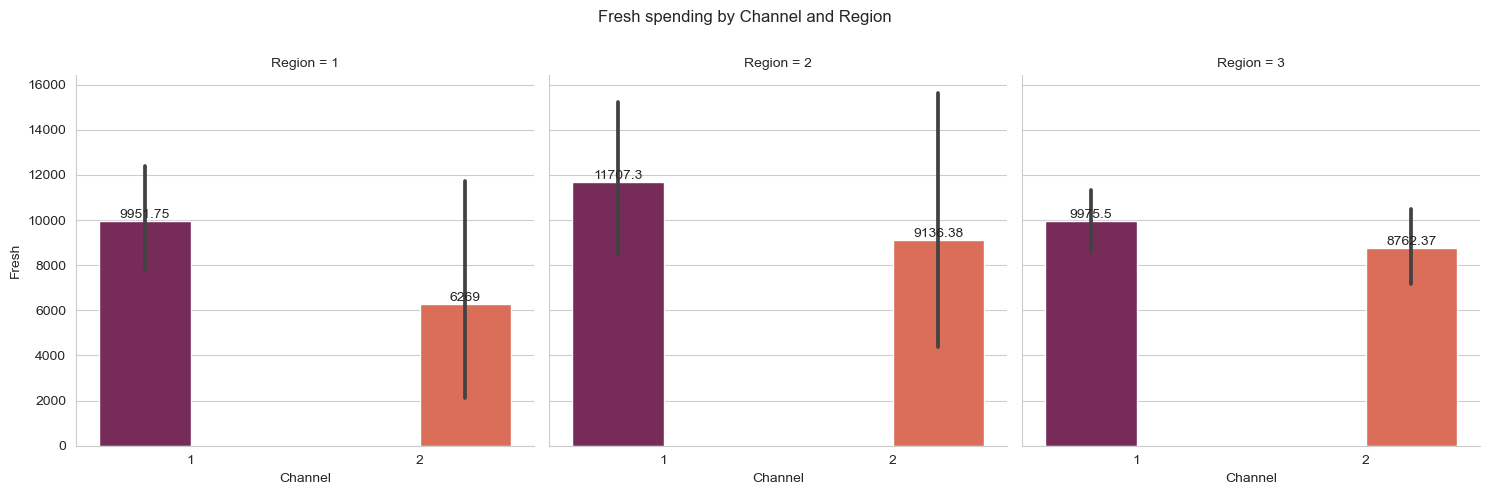

In [27]:
plot_1 = sns.catplot(data = dataset, x = 'Channel', y = 'Fresh', hue = "Channel", col = "Region", kind="bar", palette='rocket')
for ax in plot_1.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
plot_1.fig.suptitle('Fresh spending by Channel and Region')
plot_1.fig.subplots_adjust(top=0.85)
plt.show()

Channel 1 seems to have the highest spending on Fresh throughout all the regions

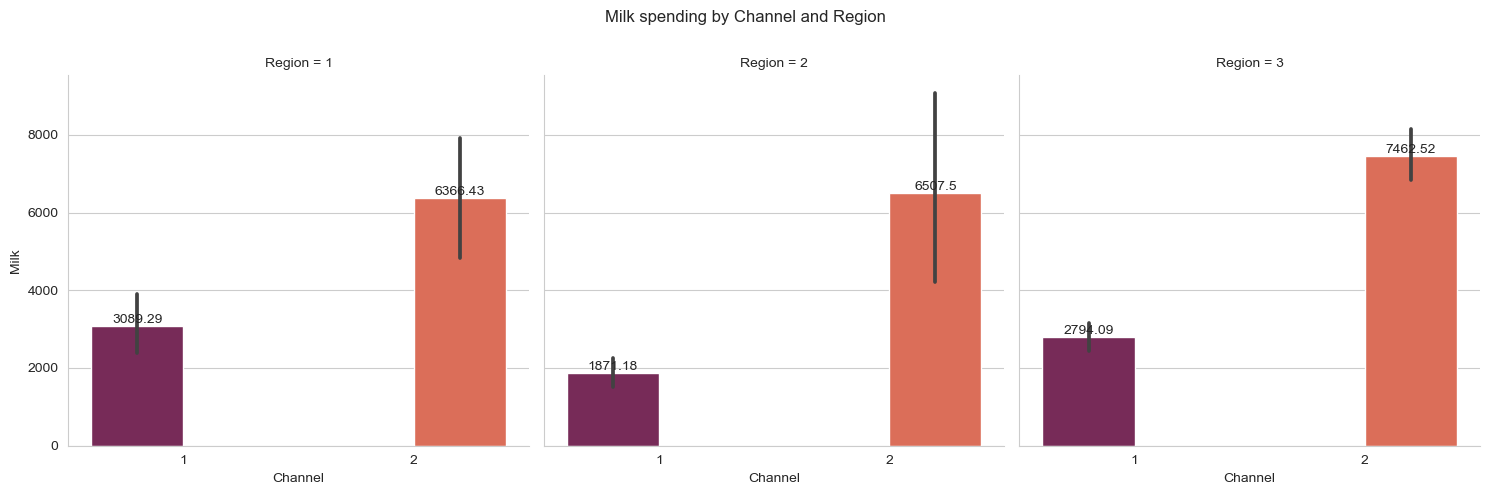

In [28]:
plot_2= sns.catplot(data = dataset, x = 'Channel', y = 'Milk', hue = "Channel", col = "Region", kind="bar", palette='rocket')
for ax in plot_2.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
plot_2.fig.suptitle('Milk spending by Channel and Region')
plot_2.fig.subplots_adjust(top=0.85)
plt.show()

Channel 2 seems to have the highest spending on Milk throughout all the regions

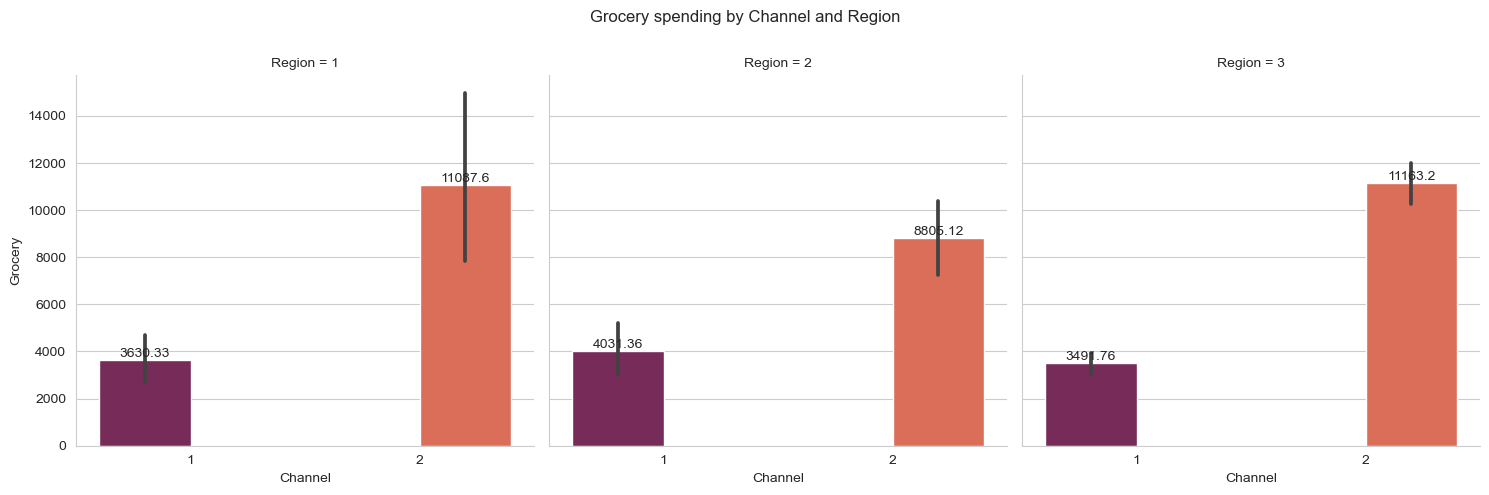

In [29]:
plot_3 = sns.catplot(data = dataset, x = 'Channel', y = 'Grocery', hue = "Channel", col = "Region", kind="bar", palette='rocket')
for ax in plot_3.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
plot_3.fig.suptitle('Grocery spending by Channel and Region')
plot_3.fig.subplots_adjust(top=0.85)
plt.show()

Channel 2 seems to have the highest spending on Grocery throughout all the regions

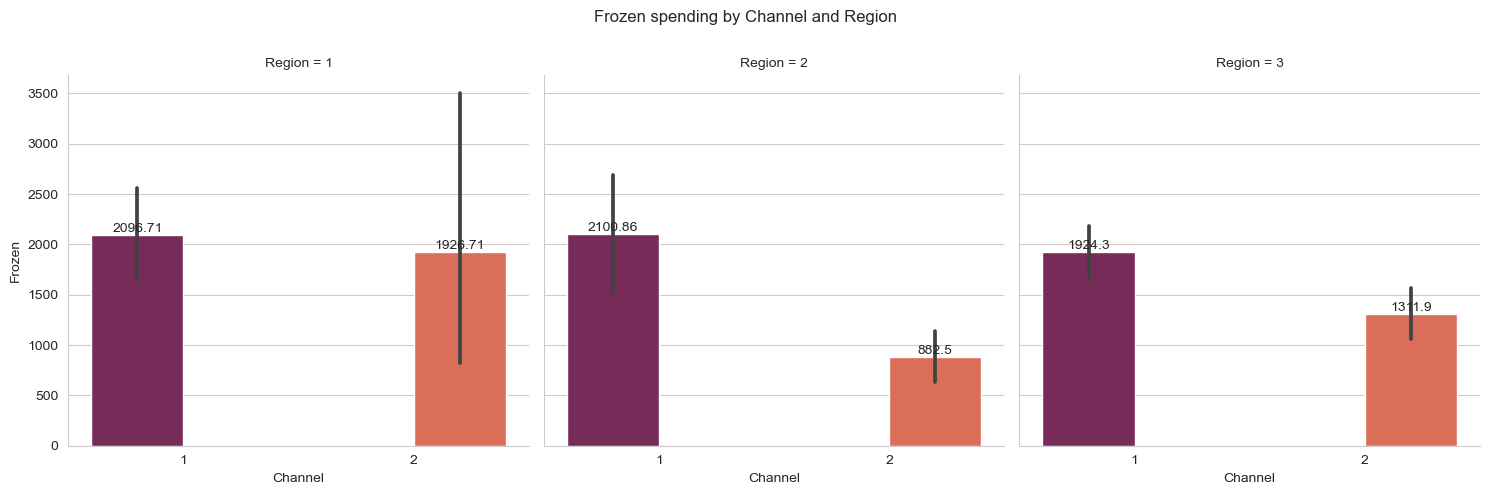

In [30]:
plot_4 = sns.catplot(data = dataset, x = 'Channel', y = 'Frozen', hue = "Channel", col = "Region", kind="bar", palette='rocket')
for ax in plot_4.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
plot_4.fig.suptitle('Frozen spending by Channel and Region')
plot_4.fig.subplots_adjust(top=0.85)
plt.show()

Channel 1 seems to have the highest spending on Frozen throughout all the regions

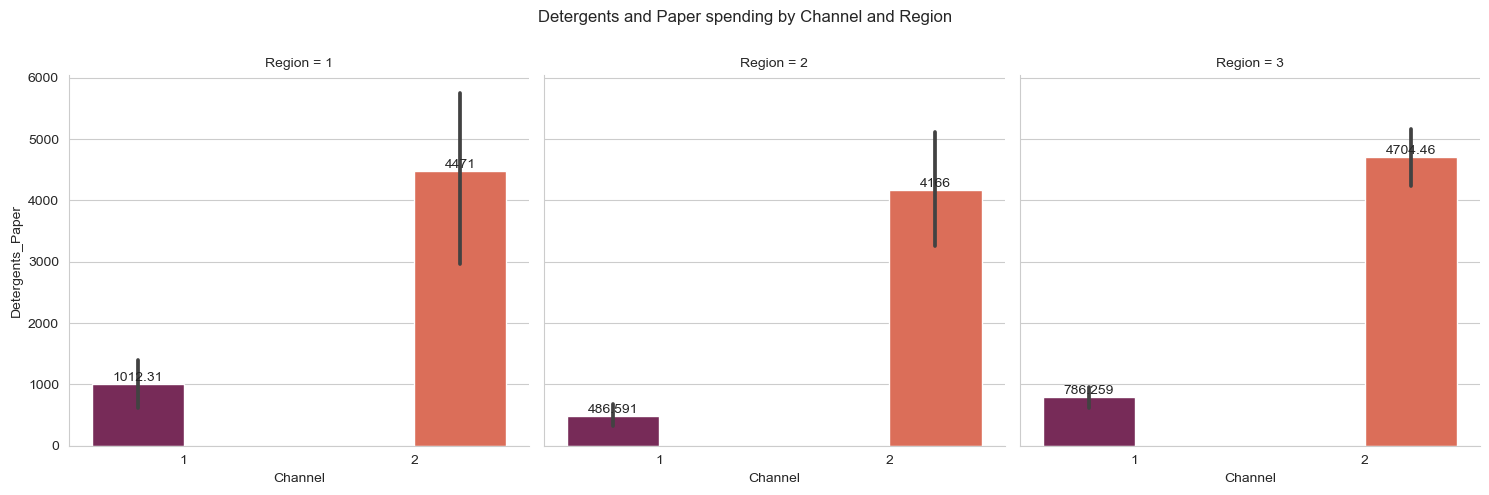

In [31]:
plot_5 = sns.catplot(data = dataset, x = 'Channel', y = 'Detergents_Paper', hue = "Channel", col = "Region", kind="bar", palette='rocket')
for ax in plot_5.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
plot_5.fig.suptitle('Detergents and Paper spending by Channel and Region')
plot_5.fig.subplots_adjust(top=0.85)
plt.show()

Channel 2 seems to have the highest spending on Detergents_Paper throughout all the regions.  
Compared to the spending patterns of other products, Detergents_Paper shows a heavily skewed spending bias towards channel 2.

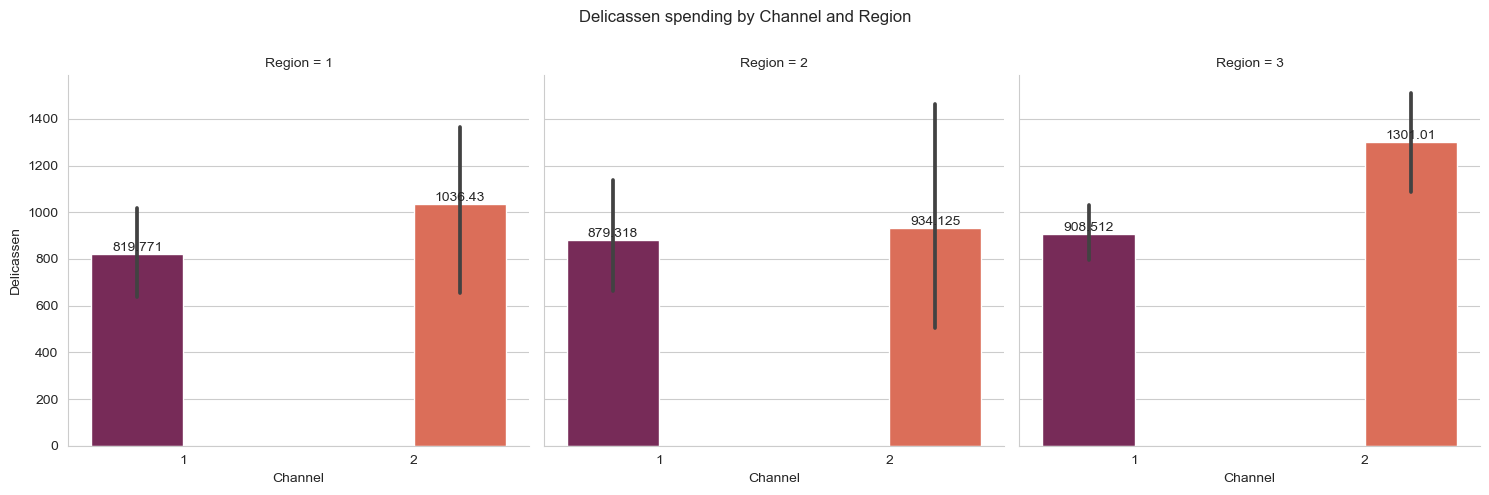

In [32]:
plot_6 = sns.catplot(data = dataset, x = 'Channel', y = 'Delicassen', hue = "Channel", col = "Region", kind="bar", palette='rocket')
for ax in plot_6.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
plot_6.fig.suptitle('Delicassen spending by Channel and Region')
plot_6.fig.subplots_adjust(top=0.85)
plt.show()

Channel 2 seems to have the highest spending on Delicassen throughout all the regions

### Analyzing average spending on products grouped by Region

In [33]:
# grouping products by region and calculating mean
dataset_region = dataset.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].mean()
dataset_region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,
1,9483.036364,3506.381818,4579.436364,2075.072727,1452.509091,847.345455
2,11021.700000,3107.533333,5304.366667,1775.966667,1467.766667,893.933333
3,9605.832618,4216.656652,5829.403433,1737.690987,1980.218884,1028.115880


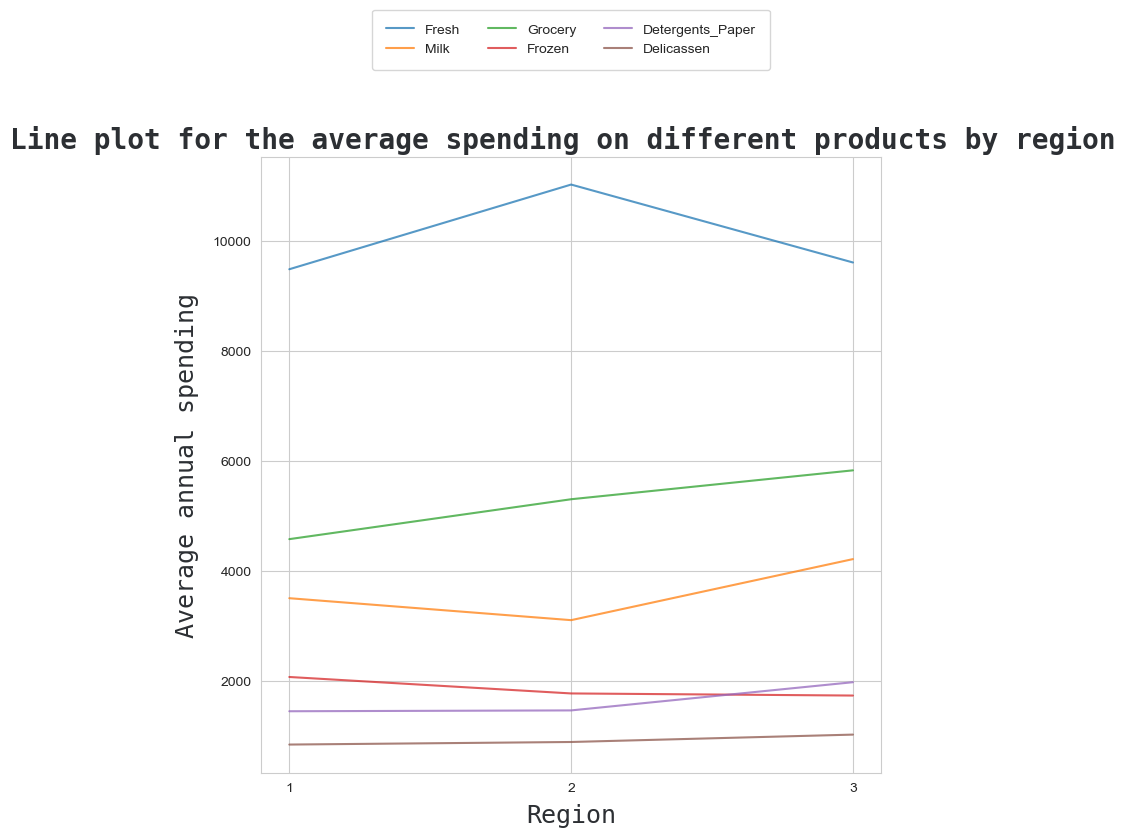

In [34]:
# Line plot for average spending on products by region
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

# Plotting the line graphs
ax.plot(dataset_region,
        alpha = 0.75)

# Setting the title
ax.set_title("Line plot for the average spending on different products by region ",
                color='#2c2f33',
                family = 'monospace',
                size = 20,
                weight = 'bold')

# Creating the x-axis labels
ax.set_xlabel('Region',
                 color='#2c2f33',
                 family = 'monospace',
                 size = 18,
                 labelpad=7)

# Creating the y-axis labels
ax.set_ylabel('Average annual spending',
                 color='#2c2f33',
                 family = 'monospace',
                 size = 18,
                 labelpad=10)

# creating a legend
ax.legend(dataset_region, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, borderpad=1)

# x-axis tick labels
plt.xticks(np.arange(1, 4, 1))

plt.show()

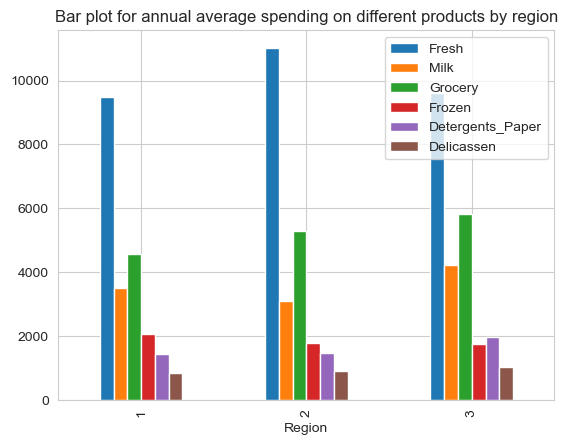

In [35]:
#Bar plot for average annual spending on products grouped by channels
dataset_region.plot.bar()

# Adding a title
plt.title("Bar plot for annual average spending on different products by region")

# showing the graph
plt.show()

### Analyzing average spending on products grouped by Channel

In [36]:
# grouping products by channel and calculating mean
dataset_channel = dataset.groupby('Channel')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].mean()
dataset_channel

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,
1,10134.806034,2767.646552,3571.599138,1976.715517,804.612069,887.383621
2,8594.209302,7284.465116,10937.674419,1322.000000,4635.372093,1245.348837


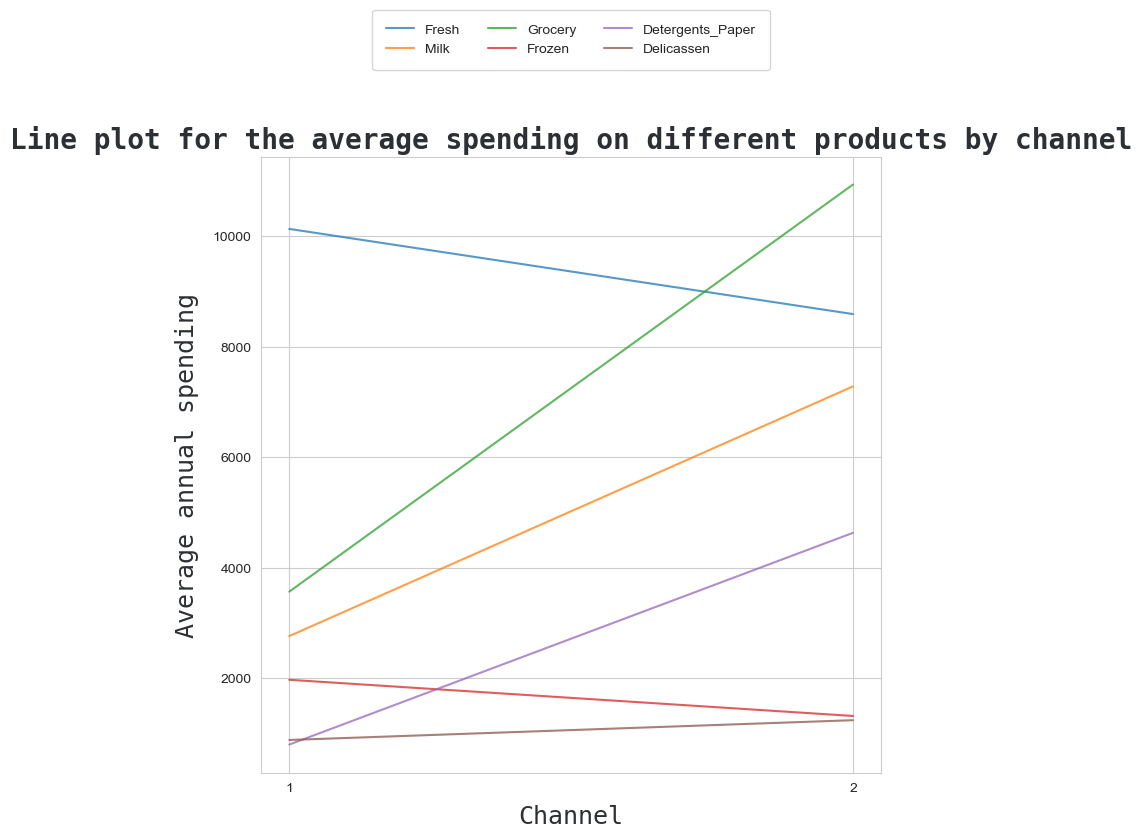

In [37]:
# Line plot for average spending on products by channel
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

# Plotting the line graphs
ax.plot(dataset_channel,
        alpha = 0.75)

# Setting the title
ax.set_title("Line plot for the average spending on different products by channel",
                color='#2c2f33',
                family = 'monospace',
                size = 20,
                weight = 'bold')

# Creating the x-axis labels
ax.set_xlabel('Channel',
                 color='#2c2f33',
                 family = 'monospace',
                 size = 18,
                 labelpad=7)

# Creating the y-axis labels
ax.set_ylabel('Average annual spending',
                 color='#2c2f33',
                 family = 'monospace',
                 size = 18,
                 labelpad=10)

# creating a legend
ax.legend(dataset_region, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, borderpad=1)

# x-axis tick labels
plt.xticks(np.arange(1, 3, 1))

plt.show()

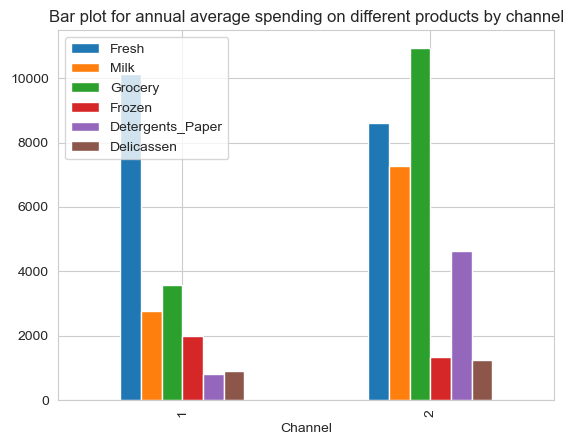

In [38]:
#Bar plot for average annual spending on products grouped by channels
dataset_channel.plot.bar()

# Adding a title
plt.title("Bar plot for annual average spending on different products by channel")

# showing the graph
plt.show()

In channel 1, Fresh products seem to have the highest average annual spending.  

In channel 2, Groceries seem to have the highest average annual spending.  

Apart from those 2 products the remaining products show a similar average spending ratio trend in both channels 

# K Means Clustering with PCA

In [39]:
# Importing required packages
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

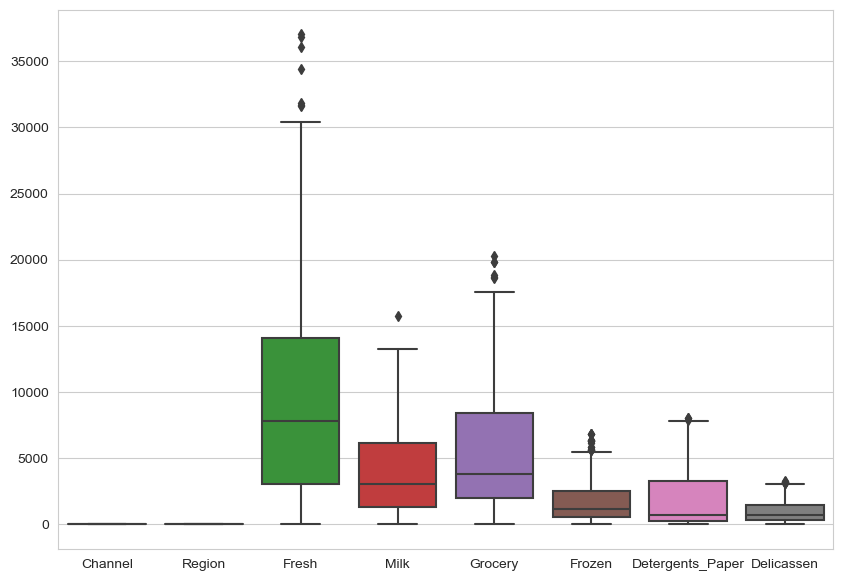

In [40]:
# Plotting a box plot for the dataset
plt.figure(figsize=(10,7))
sns.boxplot(data=dataset)
plt.show()

Since the data seems to be skewed we will scale the dataset in order to successfully carry out KMeans clustering

### Standard Scaling

In [41]:
# Making the standard scaler object
std_scale = StandardScaler()

# fitting and transforming the dataset
std_scaled_dataset_temp = std_scale.fit_transform(dataset.iloc[:,2:8])

# converting to a dataframe
std_scaled_dataset_temp_1 = pd.DataFrame(std_scaled_dataset_temp, columns= list(dataset.iloc[:,2:8].columns))
std_scaled_dataset_temp_1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.360420,1.740710,0.432714,-0.984801,0.378277,0.451178
1,-0.325039,1.788015,0.867526,-0.023386,0.659241,1.009718
2,0.433216,-0.857996,-0.290889,2.859618,-0.605321,1.025020
3,-0.037274,1.311586,-0.094823,-0.704078,-0.020699,0.595276
4,0.294097,-0.242723,0.305758,-0.819597,0.589794,-0.560060
...,...,...,...,...,...,...
313,1.392273,-0.868440,-0.175416,-0.950642,-0.232670,-0.751340
314,-0.944909,-0.236887,-0.881903,-0.160642,-0.673860,0.592726
315,0.856559,-0.020635,0.526522,-0.690414,0.240746,-0.186425
316,0.069845,-0.616863,-0.721801,-0.473040,-0.759193,1.454764


In [42]:
# combining scaled numerical features with categorical variables to remake the full dataset
std_scaled_dataset = pd.concat((dataset[["Channel", "Region"]], std_scaled_dataset_temp_1), 1)
std_scaled_dataset

C:\Users\brend\AppData\Local\Temp\ipykernel_21468\1412999323.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  std_scaled_dataset = pd.concat((dataset[["Channel", "Region"]], std_scaled_dataset_temp_1), 1)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.360420,1.740710,0.432714,-0.984801,0.378277,0.451178
1,2,3,-0.325039,1.788015,0.867526,-0.023386,0.659241,1.009718
2,1,3,0.433216,-0.857996,-0.290889,2.859618,-0.605321,1.025020
3,2,3,-0.037274,1.311586,-0.094823,-0.704078,-0.020699,0.595276
4,2,3,0.294097,-0.242723,0.305758,-0.819597,0.589794,-0.560060
...,...,...,...,...,...,...,...,...
313,1,3,1.392273,-0.868440,-0.175416,-0.950642,-0.232670,-0.751340
314,1,3,-0.944909,-0.236887,-0.881903,-0.160642,-0.673860,0.592726
315,1,3,0.856559,-0.020635,0.526522,-0.690414,0.240746,-0.186425
316,1,3,0.069845,-0.616863,-0.721801,-0.473040,-0.759193,1.454764


In [43]:
# Summary statistics for the scaled dataset
std_scaled_dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,318.000000,318.000000,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02
mean,1.270440,2.559748,6.528670e-17,2.513713e-17,8.204478e-17,4.957600e-17,-2.897752e-17,-6.563583e-17
std,0.444887,0.770851,1.001576e+00,1.001576e+00,1.001576e+00,1.001576e+00,1.001576e+00,1.001576e+00
min,1.000000,1.000000,-1.186627e+00,-1.208483e+00,-1.204708e+00,-1.102183e+00,-8.340859e-01,-1.251221e+00
25%,1.000000,2.000000,-8.151940e-01,-8.169877e-01,-7.717381e-01,-7.604397e-01,-7.316183e-01,-7.956537e-01
50%,1.000000,3.000000,-2.341049e-01,-2.900279e-01,-3.787394e-01,-3.758426e-01,-5.290660e-01,-3.037434e-01
75%,2.000000,3.000000,5.333419e-01,6.754252e-01,6.221722e-01,4.719169e-01,6.501627e-01,5.831616e-01
max,2.000000,3.000000,3.336647e+00,3.606188e+00,3.190854e+00,3.133509e+00,2.830692e+00,2.916149e+00


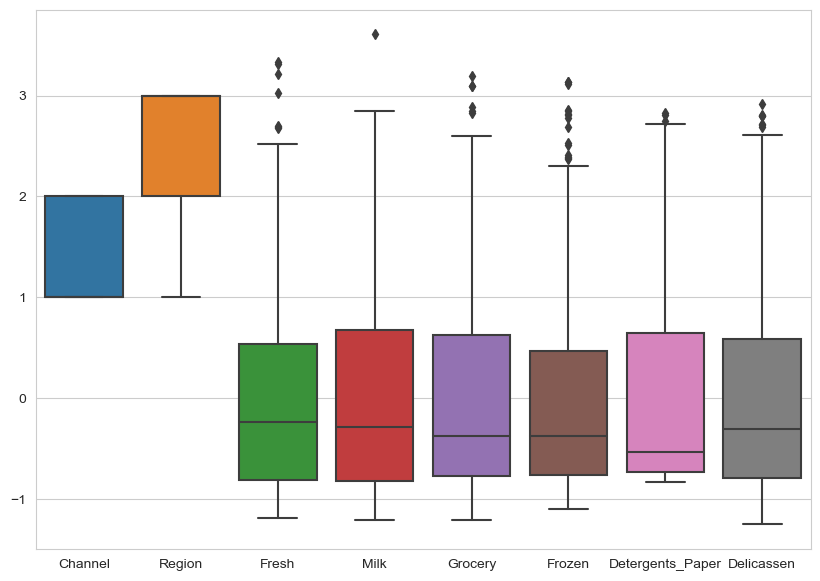

In [44]:
# Plotting a box plot for the std_scaled_dataset
plt.figure(figsize=(10,7))
sns.boxplot(data=std_scaled_dataset)
plt.show()

In [45]:
# Removing the categorical variable columns in the standard scaled dataset to create the features that will be used in PCA and K-Means Clustering
features = std_scaled_dataset.drop(['Channel','Region'], axis=1)
features

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.360420,1.740710,0.432714,-0.984801,0.378277,0.451178
1,-0.325039,1.788015,0.867526,-0.023386,0.659241,1.009718
2,0.433216,-0.857996,-0.290889,2.859618,-0.605321,1.025020
3,-0.037274,1.311586,-0.094823,-0.704078,-0.020699,0.595276
4,0.294097,-0.242723,0.305758,-0.819597,0.589794,-0.560060
...,...,...,...,...,...,...
313,1.392273,-0.868440,-0.175416,-0.950642,-0.232670,-0.751340
314,-0.944909,-0.236887,-0.881903,-0.160642,-0.673860,0.592726
315,0.856559,-0.020635,0.526522,-0.690414,0.240746,-0.186425
316,0.069845,-0.616863,-0.721801,-0.473040,-0.759193,1.454764


## Principal Component Analysis (PCA)

In [46]:
# Importing required packages
from sklearn.decomposition import PCA

Standard scaling is necessary when doing PCA too. That is why we have already scaled all the numerical variables and saved them in the variable called 'features'. So we will use that for PCA

In [47]:
features.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.360420,1.740710,0.432714,-0.984801,0.378277,0.451178
1,-0.325039,1.788015,0.867526,-0.023386,0.659241,1.009718
2,0.433216,-0.857996,-0.290889,2.859618,-0.605321,1.025020
3,-0.037274,1.311586,-0.094823,-0.704078,-0.020699,0.595276
4,0.294097,-0.242723,0.305758,-0.819597,0.589794,-0.560060


In [48]:
# Making the PCA object and using all 6 components to begin with
model_pca = PCA(n_components=6)

# Fitting and transforming the model
model_pca.fit_transform(features)

array([[ 1.61969239,  0.1679093 , -0.91543162,  0.16804238,  1.05436177,
        -0.18486653],
       [ 2.06051816,  0.50258447,  0.1222445 , -0.5413029 ,  0.83850108,
         0.02371517],
       [-1.30059273,  2.19593349,  1.84424809, -0.64952793, -0.43595652,
         0.27582854],
       ...,
       [ 0.42164534,  0.12477626, -0.79853247,  0.78691076, -0.3374172 ,
         0.12900827],
       [-0.76401638,  0.62976109, -1.02962457, -1.32599619, -0.12438598,
        -0.09321434],
       [-1.06582353, -1.79282903, -0.49247757,  0.05631326,  0.05429967,
         0.08762551]])

### Elbow curve/ Scree plot for PCA

Now we find the proportion of variance explained and the eigen values in order to select the optimum number of components using the scree plot

In [49]:
# Extracting the proportion of explained variances
pca_prop_variance = model_pca.explained_variance_ratio_

# Extracting the eigen values
pca_eigen_values = model_pca.explained_variance_

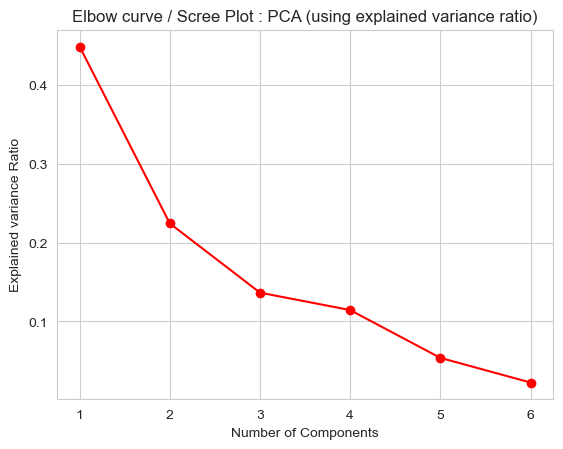

In [51]:
# Creating a variable that holds the number of PCA components
n_pca_components = np.arange(model_pca.n_components_) + 1

# Plotting the explained variance ratio vs number of components graph
plt.plot(n_pca_components, pca_prop_variance, 'ro-')
plt.title('Elbow curve / Scree Plot : PCA (using explained variance ratio)')
plt.xlabel('Number of Components')
plt.ylabel('Explained variance Ratio')
plt.show()

Therefore by The Elbow Rule, we retain the first 3 components as the bend occurs at 3.

Hence we rerun the PCA with 3 components 

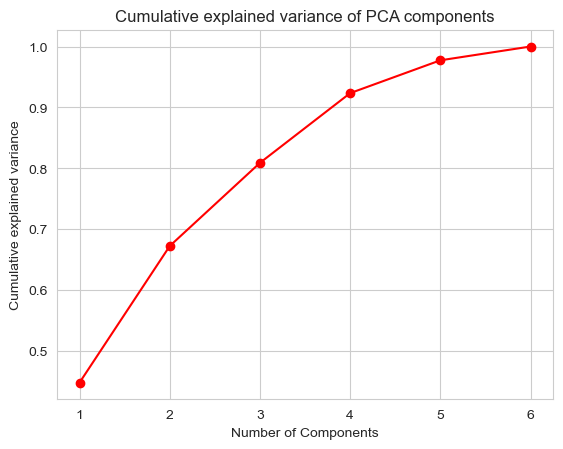

In [52]:
# Creating a variable that holds the number of PCA components
n_pca_components = np.arange(model_pca.n_components_) + 1

# Plotting the cumulative explained variance vs number of components graph
plt.plot(n_pca_components, pca_prop_variance.cumsum(), 'ro-')
plt.title('Cumulative explained variance of PCA components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.show()

A rule of thumb is to keep atleast 80% of the variance. Therefore we keep the first 3 components

Hence we rerun the PCA with 3 components

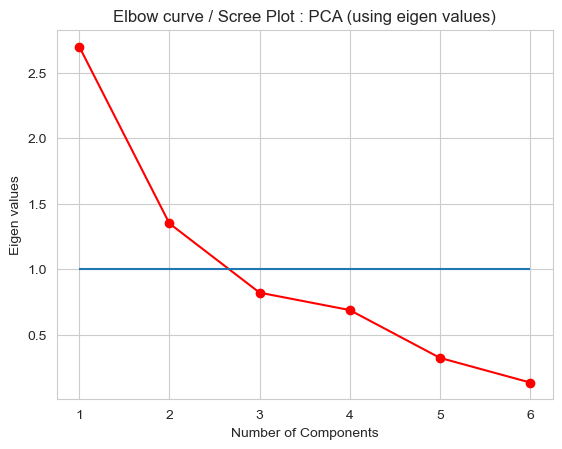

In [53]:
# Creating a variable that holds the number of PCA components
n_pca_components = np.arange(model_pca.n_components_) + 1

# Plotting the eigen values vs number of components graph
plt.plot(n_pca_components, pca_eigen_values, 'ro-')
plt.title('Elbow curve / Scree Plot : PCA (using eigen values)')
plt.xlabel('Number of Components')
plt.ylabel('Eigen values')
plt.hlines(y=1, label='Eigen value = 1', xmin=1, xmax=6)
plt.show()

Kaiser’s rule is a commonly used method to select the number of components in a PCA. It’s based on keeping the components with eigenvalues greater than 1.

### PCA with 3 components

In [54]:
# Making the PCA object and using 3 components
model_pca_n3 = PCA(n_components=3)

# Fitting and transforming the model
features_pca = model_pca_n3.fit_transform(features)
features_pca

array([[ 1.61969239e+00,  1.67909295e-01, -9.15431623e-01],
       [ 2.06051816e+00,  5.02584473e-01,  1.22244496e-01],
       [-1.30059273e+00,  2.19593349e+00,  1.84424809e+00],
       [ 8.91245665e-01,  9.53238328e-02, -6.89804346e-01],
       [ 3.70743072e-01, -5.76068340e-01, -5.48762863e-01],
       [ 1.48047037e+00,  9.61890208e-01, -2.75900284e-01],
       [ 1.28296621e-01, -8.76817249e-01, -4.85512373e-01],
       [ 4.62302244e+00,  4.53438310e-01,  2.72526494e-01],
       [ 2.17195979e+00,  7.83799922e-01,  1.94493444e+00],
       [-1.05183459e+00, -2.38128605e-01, -3.82094885e-01],
       [ 3.06957960e+00,  2.94477472e+00, -2.09308066e+00],
       [ 2.34928627e+00,  9.96321820e-01,  8.73139716e-01],
       [ 2.81687744e+00,  1.70804653e+00, -1.43407139e+00],
       [-9.07527816e-01, -8.56307606e-01, -7.33503840e-01],
       [ 2.58532240e+00, -1.01702024e+00, -1.00126656e-01],
       [ 1.62096407e+00,  2.51358865e+00, -7.36703917e-01],
       [ 4.26166583e-01, -8.70475116e-01

## K-Means Clustering

### Identifying the optimum number of clusters

In [55]:
# Making an empty list to hold the WCSS (Within Cluster Sum of Squares) values
wcss_list_pca = []

# Filling the above list with inertia values for each number of clusters plugged into the KMeans() function
for i in range(1, 11):
    k_means_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 4)
    k_means_pca.fit(features_pca)
    inertia_pca = k_means_pca.inertia_
    wcss_list_pca.append(inertia_pca)


C:\Users\brend\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Elbow curve for K-Means clustering

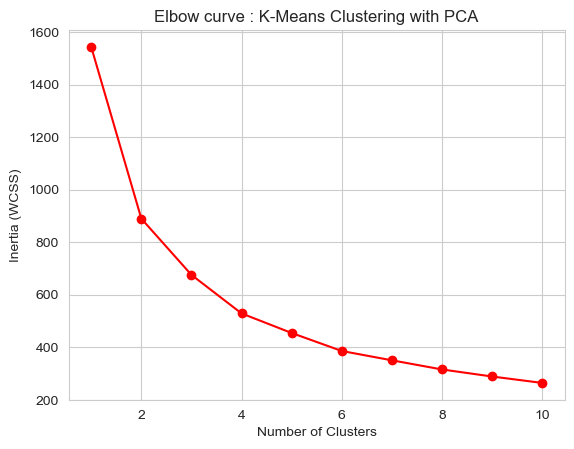

In [56]:
# Plotting the elbow curve / scree plot

# Creating a variable that holds the number of clusters
n_cluster = range(1,11)

# Plotting the inertia(WCSS) vs number of clusters graph
plt.plot(n_cluster, wcss_list_pca,'ro-')
plt.title('Elbow curve : K-Means Clustering with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.show()

### Silhoutte coefficient graph for K-Means clustering

In [57]:
# A list to hold the silhouette coefficients for each k
silhouette_coefficients_pca = []

# Note that you should start at 2 clusters for the silhouette coefficient
for k in range(2, 11):
    kmeans_sc_pca = KMeans(n_clusters=k, init = 'k-means++', random_state = 4)
    kmeans_sc_pca.fit(features_pca)
    score_pca = silhouette_score(features_pca, kmeans_sc_pca.labels_)
    silhouette_coefficients_pca.append(score_pca)

Plotting the silhoutte coefficient graph

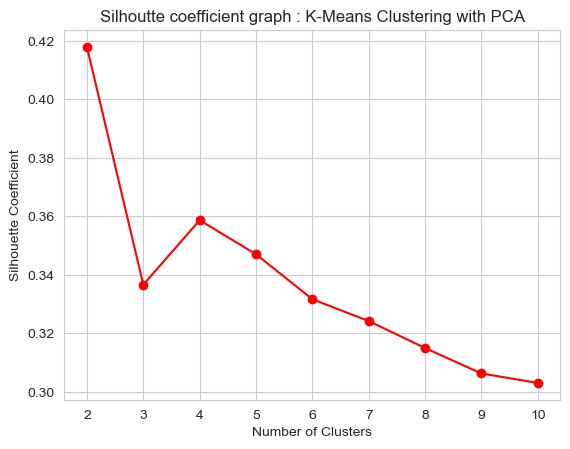

In [58]:
plt.plot(range(2, 11), silhouette_coefficients_pca, 'ro-')
plt.xticks(range(2, 11))
plt.title('Silhoutte coefficient graph : K-Means Clustering with PCA')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

It can be seen above that there are sharp bends at 2 and 4 in the scree plot

It can be seen above there is a peak at 2 in the silhoutte score

Hence using the elbow rule we deduce that 2 clusters is the optimum number of clusters

### K-Means clustering with n_clusters=2

In [59]:
# Making the K-Means clustering object
model_km_2 = KMeans(n_clusters=2)

# Training the model using the features_pca
model_km_2.fit(features_pca)

# Predicting values
y_pred_km_2 = model_km_2.predict(features_pca)

# viewing predictions
y_pred_km_2

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,

In [60]:
# Checking the shape of predictions
y_pred_km_2.shape

(318,)

In [61]:
# checking the shape of features_pca
features_pca.shape

(318, 3)

In [62]:
# Creating a dataframe using features_pca
pca_dataframe= pd.DataFrame(features_pca, columns=['PC1','PC2','PC3'])
pca_dataframe

,PC1,PC2,PC3
0,1.619692,0.167909,-0.915432
1,2.060518,0.502584,0.122244
2,-1.300593,2.195933,1.844248
3,0.891246,0.095324,-0.689804
4,0.370743,-0.576068,-0.548763
...,...,...,...
313,-0.816651,-0.044141,-1.267419
314,-0.747540,-0.359202,-0.122238
315,0.421645,0.124776,-0.798532
316,-0.764016,0.629761,-1.029625


In [63]:
# Adding predicted clusters from K-Means with PCA to the the pca_dataframe as a column
pca_dataframe_clusters = pca_dataframe.copy()
pca_dataframe_clusters['Cluster_2'] = y_pred_km_2
pca_dataframe_clusters

,PC1,PC2,PC3,Cluster_2
0,1.619692,0.167909,-0.915432,0
1,2.060518,0.502584,0.122244,0
2,-1.300593,2.195933,1.844248,1
3,0.891246,0.095324,-0.689804,0
4,0.370743,-0.576068,-0.548763,1
...,...,...,...,...
313,-0.816651,-0.044141,-1.267419,1
314,-0.747540,-0.359202,-0.122238,1
315,0.421645,0.124776,-0.798532,1
316,-0.764016,0.629761,-1.029625,1


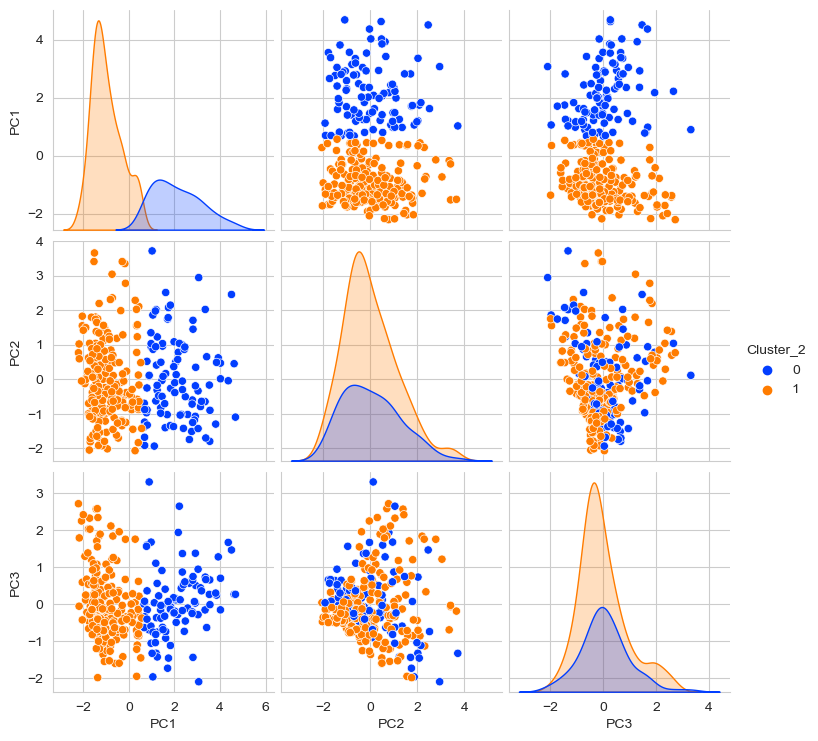

In [64]:
# Making a pairplot for pca_dataframe_clusters
sns.set_style("whitegrid")
sns.pairplot(data= pca_dataframe_clusters, hue = 'Cluster_2', palette = 'bright')
plt.show()

As expected we can see clear clusters between PC1 and PC2 as they contain most of the explanatory variance

We can also see clusters between PC1 and PC3

### Correlation matrix between features and principal components

In [65]:
# Concatenating features dataframe and pca_dataframe_clusters
features_pca_full = pd.concat([features, pca_dataframe_clusters], axis=1)
features_pca_full

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,PC1,PC2,PC3,Cluster_2
0,0.360420,1.740710,0.432714,-0.984801,0.378277,0.451178,1.619692,0.167909,-0.915432,0
1,-0.325039,1.788015,0.867526,-0.023386,0.659241,1.009718,2.060518,0.502584,0.122244,0
2,0.433216,-0.857996,-0.290889,2.859618,-0.605321,1.025020,-1.300593,2.195933,1.844248,1
3,-0.037274,1.311586,-0.094823,-0.704078,-0.020699,0.595276,0.891246,0.095324,-0.689804,0
4,0.294097,-0.242723,0.305758,-0.819597,0.589794,-0.560060,0.370743,-0.576068,-0.548763,1
...,...,...,...,...,...,...,...,...,...,...
313,1.392273,-0.868440,-0.175416,-0.950642,-0.232670,-0.751340,-0.816651,-0.044141,-1.267419,1
314,-0.944909,-0.236887,-0.881903,-0.160642,-0.673860,0.592726,-0.747540,-0.359202,-0.122238,1
315,0.856559,-0.020635,0.526522,-0.690414,0.240746,-0.186425,0.421645,0.124776,-0.798532,1
316,0.069845,-0.616863,-0.721801,-0.473040,-0.759193,1.454764,-0.764016,0.629761,-1.029625,1


In [66]:
# Creating a correlation matrix
correlation_matrix_pca = features_pca_full.corr('pearson')
correlation_matrix_pca

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,PC1,PC2,PC3,Cluster_2
Fresh,1.000000,-0.056104,-0.064819,0.200101,-0.202086,0.211049,-1.644252e-01,7.562760e-01,-3.533708e-01,0.119447
Milk,-0.056104,1.000000,0.736872,-0.165518,0.685531,0.290687,8.699759e-01,1.024810e-01,4.194238e-02,-0.760000
Grocery,-0.064819,0.736872,1.000000,-0.201720,0.845943,0.272322,9.322891e-01,5.283234e-02,5.732420e-02,-0.823988
Frozen,0.200101,-0.165518,-0.201720,1.000000,-0.185918,0.075176,-2.999905e-01,5.534820e-01,7.765745e-01,0.221192
Detergents_Paper,-0.202086,0.685531,0.845943,-0.185918,1.000000,0.163153,9.064845e-01,-9.253687e-02,1.831148e-01,-0.810451
Delicassen,0.211049,0.290687,0.272322,0.075176,0.163153,1.000000,3.535495e-01,6.671269e-01,-2.292760e-01,-0.285548
PC1,-0.164425,0.869976,0.932289,-0.299990,0.906485,0.353550,1.000000e+00,5.873284e-17,4.351450e-17,-0.874050
PC2,0.756276,0.102481,0.052832,0.553482,-0.092537,0.667127,5.873284e-17,1.000000e+00,3.824916e-17,-0.017959
PC3,-0.353371,0.041942,0.057324,0.776575,0.183115,-0.229276,4.351450e-17,3.824916e-17,1.000000e+00,-0.039659
Cluster_2,0.119447,-0.760000,-0.823988,0.221192,-0.810451,-0.285548,-8.740503e-01,-1.795869e-02,-3.965913e-02,1.000000


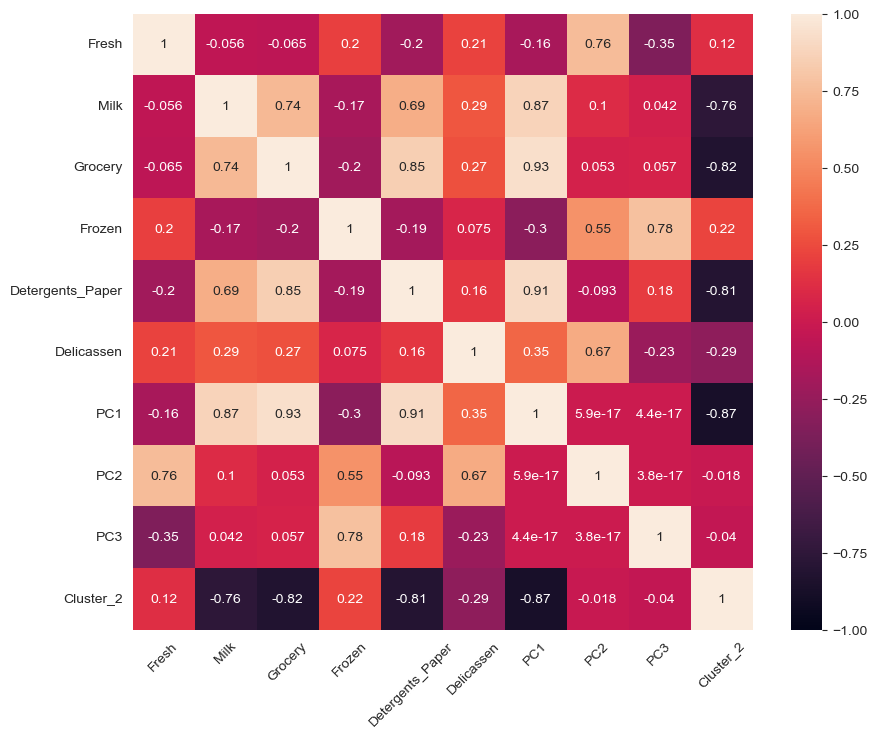

In [67]:
#Plotting a correlation matrix
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation_matrix_pca, annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()

### Biplot for PCA analysis

We will use the first 2 principal components for the biplot as they explain most of the variablity

In [68]:
# Extracting Principal component 1 (PC1) and storing it in xs
xs = features_pca[:,0]

# Extracting Principal component 2 (PC2) and storing it in ys
ys = features_pca[:,1]

# calculating the scaling factors for x and y axes based on the range of PC1 and PC2
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

# saving feature names as a list
feature_names = list(features.columns)

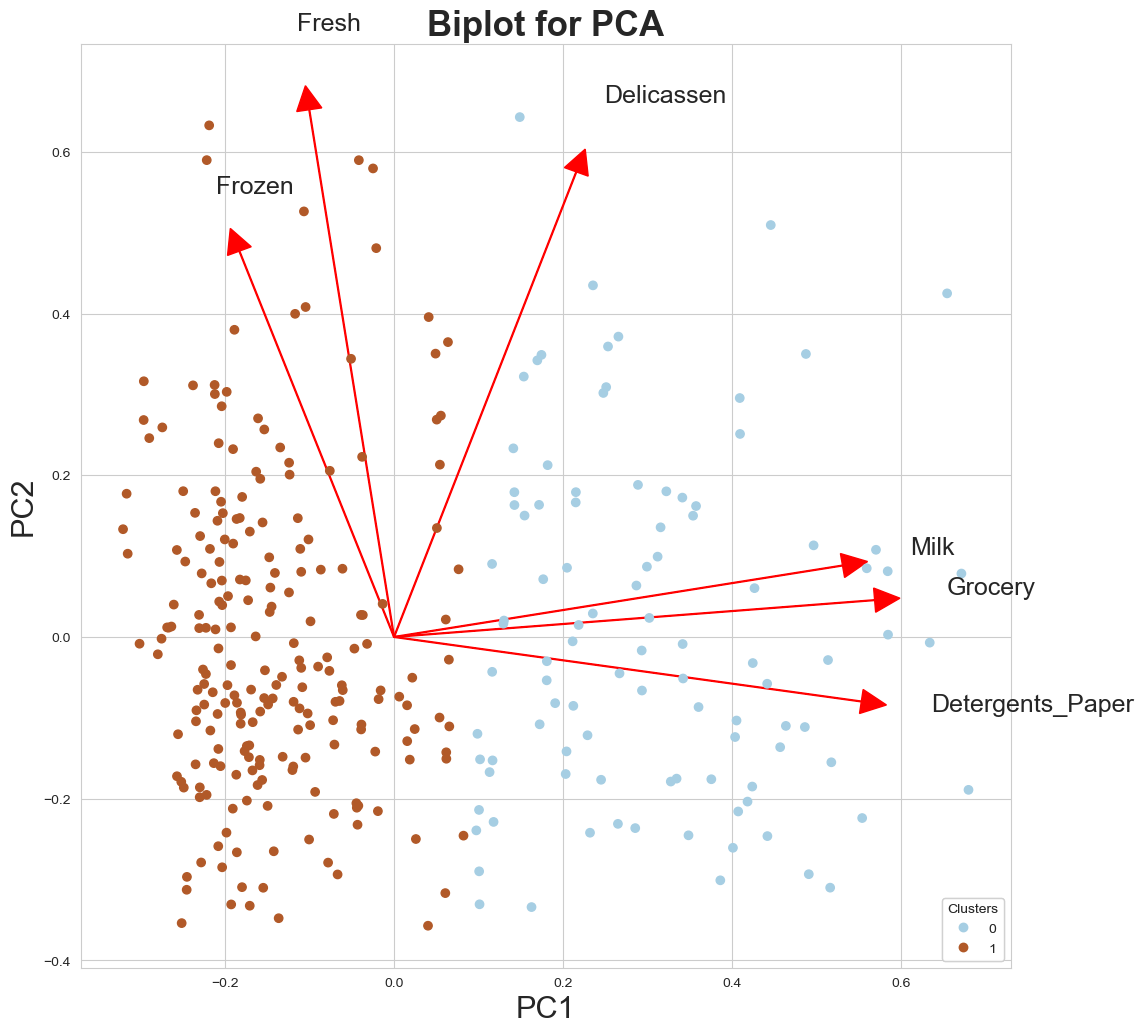

In [69]:
# Plotting the biplot
fig, ax = plt.subplots(figsize=(12,12))
 
# Making arrows to understand the contribution of each feature to PC1 and PC2
for i, feature in enumerate(feature_names):
    ax.arrow(0, 0, model_pca_n3.components_[0, i], 
             model_pca_n3.components_[1, i],
             color='r',
             head_width=0.03, 
             head_length=0.03)
    ax.text(model_pca_n3.components_[0, i] * 1.15, 
            model_pca_n3.components_[1, i] * 1.15, 
            feature, fontsize = 18)

# Plotting the points of PC1 vs PC2
scatter = ax.scatter(xs * scalex,ys * scaley, 
                     c=features_pca_full.Cluster_2, 
                     cmap='Paired')

# Setting x-axis label
ax.set_xlabel('PC1', fontsize=22)

# Setting y-axis label
ax.set_ylabel('PC2', fontsize=22)

# Setting title
ax.set_title('Biplot for PCA', fontsize=25, weight='bold')
 
# Making the legend
legend_1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Clusters")
ax.add_artist(legend_1)

plt.show()